<a href="https://colab.research.google.com/github/raa18-git/linkedin-skill-assessments-quizzes/blob/main/me644_hw1_ruchira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

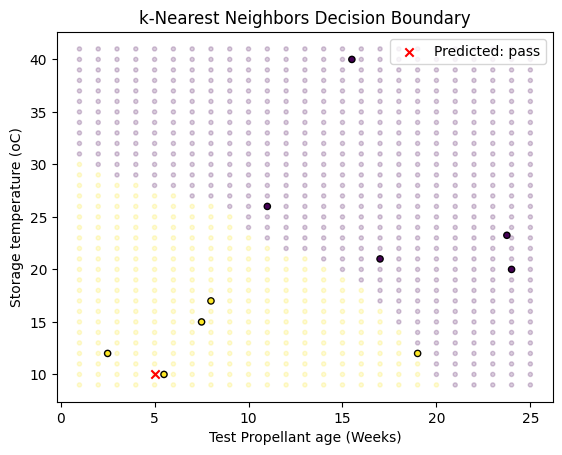

Predicted result for new point: pass


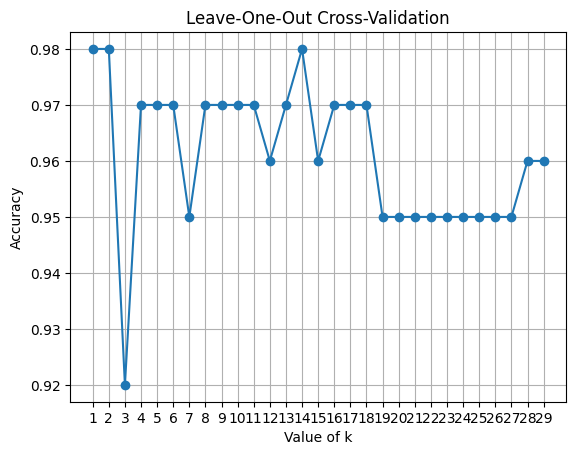

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Sample data for k-Nearest Neighbors
data_knn = [
    (15.5, 40, "fail"),
    (23.75, 23.25, "fail"),
    (8, 17, "pass"),
    (17, 21, "fail"),
    (5.5, 10, "pass"),
    (19, 12, "pass"),
    (24, 20, "fail"),
    (2.5, 12, "pass"),
    (7.5, 15, "pass"),
    (11, 26, "fail")
]

# Sample data for Leave-One-Out Cross-Validation
np.random.seed(0)
num_samples = 100
propellant_age = np.random.uniform(0, 25, num_samples)
storage_temperature = np.random.uniform(0, 30, num_samples)
labels = np.where(propellant_age + storage_temperature > 20, 'pass', 'fail')
data_loocv = list(zip(propellant_age, storage_temperature, labels))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(data, new_point, k=5):
    distances = [euclidean_distance(new_point, np.array(point[:2])) for point in data]
    k_indices = np.argsort(distances)[:k]
    k_labels = [data[i][2] for i in k_indices]
    most_common = Counter(k_labels).most_common(1)
    return most_common[0][0]

def plot_decision_boundary(data, new_point):
    x = [point[:2] for point in data]
    x_min = min(x, key=lambda p: p[0])[0] - 1
    x_max = max(x, key=lambda p: p[0])[0] + 1
    y_min = min(x, key=lambda p: p[1])[1] - 1
    y_max = max(x, key=lambda p: p[1])[1] + 1

    xx, yy = [], []
    for i in range(int(x_min), int(x_max) + 1):
        for j in range(int(y_min), int(y_max) + 1):
            xx.append(i)
            yy.append(j)

    Z = [k_nearest_neighbors(data, [i, j]) for i, j in zip(xx, yy)]

    plt.scatter([point[0] for point in data], [point[1] for point in data], c=[1 if point[2] == "pass" else 0 for point in data], s=20, edgecolors='k')
    plt.scatter(xx, yy, c=[1 if label == "pass" else 0 for label in Z], marker='.', alpha=0.2)

    # Plot the new point and its predicted label
    new_point_label = k_nearest_neighbors(data, new_point)
    plt.scatter(new_point[0], new_point[1], c='red', marker='x', label=f"Predicted: {new_point_label}")

    plt.xlabel('Test Propellant age (Weeks)')
    plt.ylabel('Storage temperature (oC)')
    plt.title('k-Nearest Neighbors Decision Boundary')
    plt.legend()
    plt.show()

def loocv(data, k):
    num_correct = 0
    for i in range(len(data)):
        data_without_point = data[:i] + data[i+1:]
        predicted_label = k_nearest_neighbors(data_without_point, np.array(data[i][:2]), k)
        if predicted_label == data[i][2]:
            num_correct += 1
    accuracy = num_correct / len(data)
    return accuracy

# Plot the decision boundary with a new point
new_point = (5, 10)
plot_decision_boundary(data_knn, new_point)

# Test the kNN classifier on the new point
result = k_nearest_neighbors(data_knn, new_point)
print("Predicted result for new point:", result)

# Perform LOOCV for different values of k
k_values = range(1, 30)
accuracies = [loocv(data_loocv, k) for k in k_values]

# Plot LOOCV results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Leave-One-Out Cross-Validation')
plt.xticks(k_values)
plt.grid(True)
plt.show()



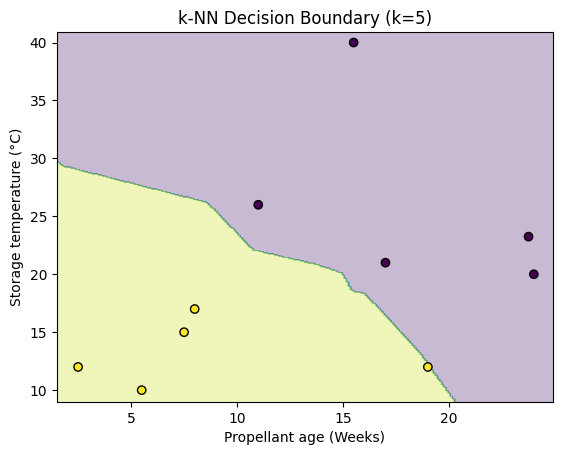

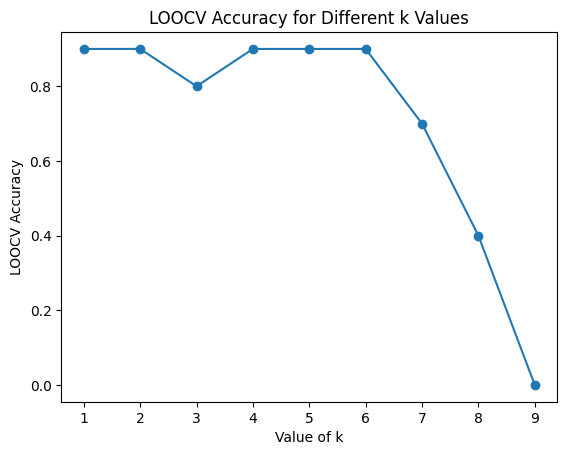

Optimum value of k: 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

# Sample data: [Propellant age, Storage temperature, Pass/Fail]
data = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

# Split data into features (X) and labels (y)
X = data[:, :2]  # Features: Propellant age, Storage temperature
y = data[:, 2]   # Labels: Pass/Fail

# Create and train kNN model with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Define function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Propellant age (Weeks)')
    plt.ylabel('Storage temperature (°C)')
    plt.title(f'k-NN Decision Boundary (k={k})')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, knn)

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
loo.get_n_splits(X)

# Perform LOOCV for different values of k
accuracies = []
k_values = range(1, 10)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    correct_predictions = 0

    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train, y_train)
        if knn.predict(X_test) == y_test:
            correct_predictions += 1

    accuracy = correct_predictions / len(y)
    accuracies.append(accuracy)

# Plot LOOCV results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Value of k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.show()

# Find the optimal value of k
optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimum value of k: {optimal_k}')


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

# Sample data: [Propellant age, Storage temperature, Pass/Fail]
data = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

# Split data into features (X) and labels (y)
X = data[:, :2]  # Features: Propellant age, Storage temperature
y = data[:, 2]   # Labels: Pass/Fail

# Create and train kNN model with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Define function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Propellant age (Weeks)')
    plt.ylabel('Storage temperature (°C)')
    plt.title(f'k-NN Decision Boundary (k={k})')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, knn)

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
loo.get_n_splits(X)

# Perform LOOCV for different values of k
accuracies = []
k_values = range(1, 10)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    correct_predictions = 0
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train, y_train)
        if knn.predict(X_test) == y_test:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(y)
    accuracies.append(accuracy)

# Plot LOOCV results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Value of k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.show()

# Find the optimal value of k
optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimum value of k: {optimal_k}')
